# 1. 문제 1
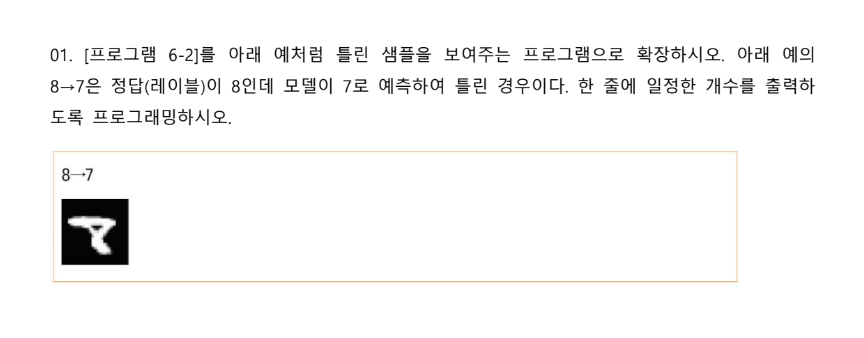

In [ ]:
from torch import nn, optim, from_numpy, tensor
import numpy as np
from torch.utils.data import Dataset, DataLoader 
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor #읽어드린 값을 텐서로 바꾸기 위함

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256,120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120,84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84,10)
        self.relu5 = nn.ReLU()

    def forward(self,input):
        y= self.conv1(input)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0],-1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor #읽어드린 값을 텐서로 바꾸기 위함

batch_size = 256
train_dataset = mnist.MNIST(root='./train', train=True, transform=ToTensor(), download=True)
test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor(), download=True)
trainloader = DataLoader(train_dataset, batch_size = batch_size)
testloader = DataLoader(test_dataset, batch_size = batch_size)


#모델 선언
model = LeNet5().cuda() #gpu 할당
optimizer = SGD(model.parameters(), lr=1e-1)
criterion = CrossEntropyLoss()
epochs = 10

#train code
t_accs, v_accs, t_loss, v_loss = [], [], [], []
for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()

    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))

PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/train-images-idx3-ubyte.gz to ./test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/train-labels-idx1-ubyte.gz to ./test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./test/MNIST/raw

Processing...
Done!
==>Epoch[1/10]
loss: 2.0778167354299666, accuracy: 0.2552471160888672. val_loss:1.7229377567768096
==>Epoch[2/10]
loss: 0.91162037633835, accuracy: 0.6735759973526001. val_loss:0.5673253156244755
==>Epoch[3/10]
loss: 0.4160648542515775, accuracy: 0.8452293872833252. val_loss:0.5126894697546959
==>Epoch[4/10]
loss: 0.3632947195083537, accuracy: 0.8594747185707092. val_loss:0.45282388255000117
==>Epoch[5/10]
loss: 0.2764238258268922, accuracy: 0.8944536447525024. val_loss:0.227528576052282
==>Epoch[6/10]
loss: 0.07793728423384118, accuracy: 0.9763685464859009. val_loss:0.08789113139791879
==>Epoch[7/10]
loss: 0.06331437654654555, accuracy: 0.9805740118026733. val_loss:0.08333876996475738
==>Epoch[8/10]
loss: 0.055165501629458144, accuracy: 0.9833831787109375. val_loss:0.07736486900830641
==>Epoch[9/10]
loss: 0.049058127111477896, accuracy: 0.9854941964149475. val_loss:0.06984888880760991
==>Ep

## 모델 불러온 후, 틀린 샘플만 출력

In [ ]:
net = LeNet5() 
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

6) => 0)


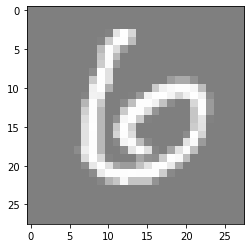

6) => 0)


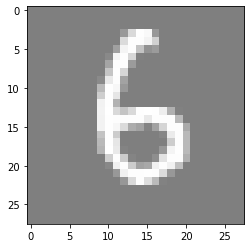

6) => 0)


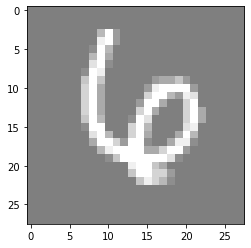

7) => 2)


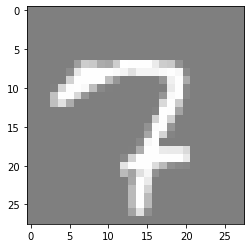

7) => 2)


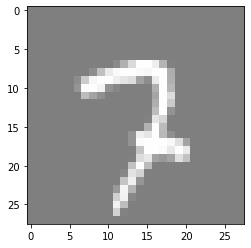

6) => 0)


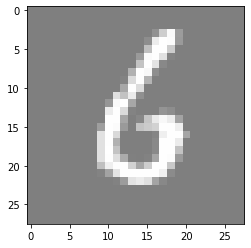

6) => 0)


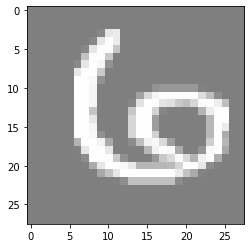

6) => 0)


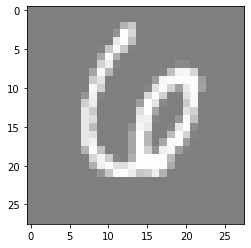

6) => 0)


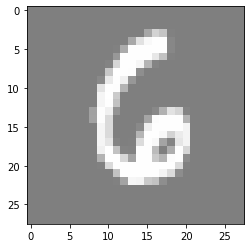

6) => 0)


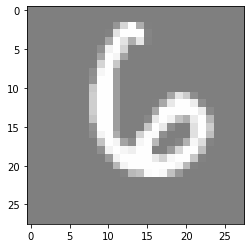

6) => 0)


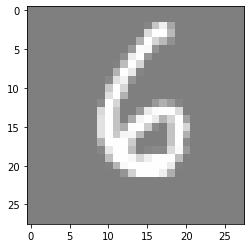

6) => 0)


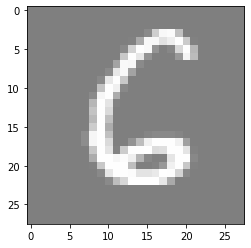

6) => 0)


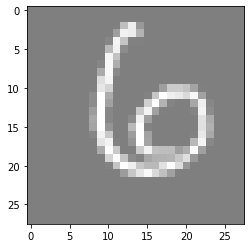

6) => 0)


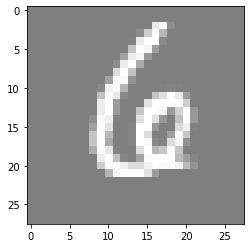

6) => 0)


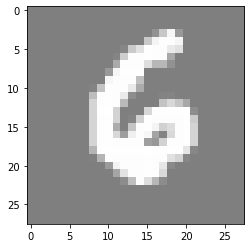

6) => 0)


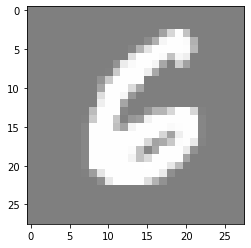

6) => 0)


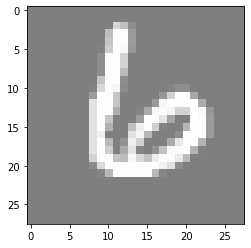

6) => 0)


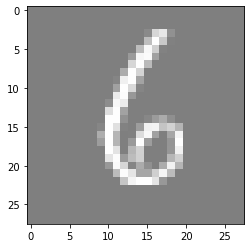

6) => 0)


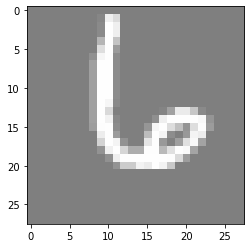

6) => 0)


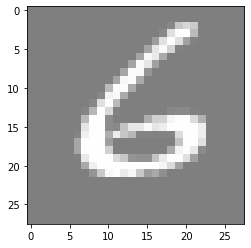

6) => 0)


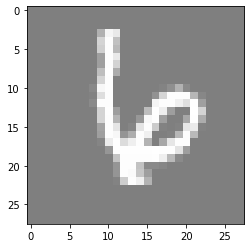

7) => 2)


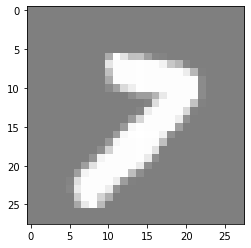

6) => 0)


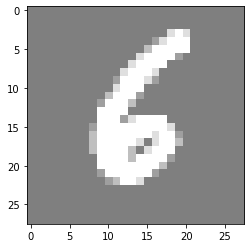

6) => 0)


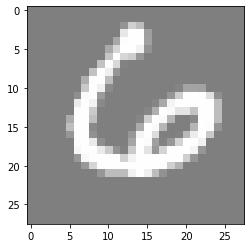

6) => 0)


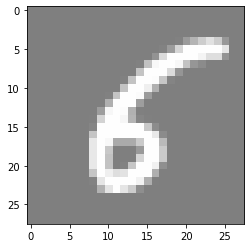

4) => 2)


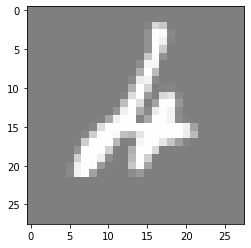

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = dataiter.next()

outputs = net(images)
_, predicted = torch.max(outputs, 1)
for j in range(len(images)):
    if labels[j] != predicted[j]:
        # print('GroundTruth: ', labels[j])
        # print('Predicted: ', predicted[j])
        print(str(labels[j]).replace('tensor(','').replace(", device='cuda:0')",""), "=>" , str(predicted[j]).replace('tensor(','').replace(", device='cuda:0')",""))
        imshow(torchvision.utils.make_grid(images[j]))

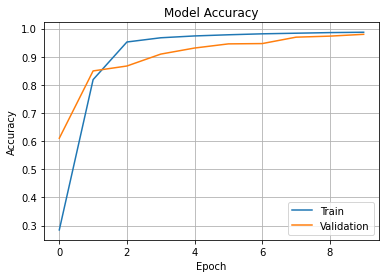

In [ ]:
import matplotlib.pyplot as plt

plt.title("Model Accuracy")
plt.plot(t_accs, label='Training Accuracy')
plt.plot(v_accs, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 2. 문제2
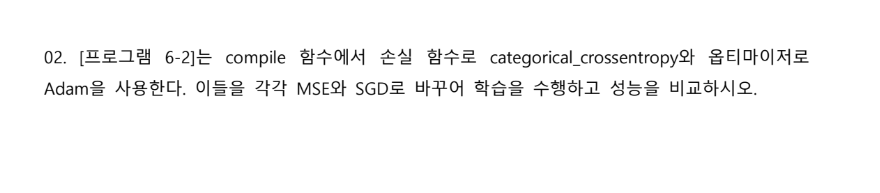

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor #읽어드린 값을 텐서로 바꾸기 위함

batch_size = 256
train_dataset = mnist.MNIST(root='./train', train=True, transform=ToTensor(), download=True)
test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor(), download=True)
trainloader = DataLoader(train_dataset, batch_size = batch_size)
testloader = DataLoader(test_dataset, batch_size = batch_size)


#모델 선언
model = LeNet5().cuda() #gpu 할당
optimizer = Adam(model.parameters(), lr=1e-1)
criterion = CrossEntropyLoss()
epochs = 10

#train code
t_accs, v_accs, t_loss, v_loss = [], [], [], []
for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()

    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))

PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

==>Epoch[1/10]
loss: 2.409737772637225, accuracy: 0.09857048094272614. val_loss:2.3025848984718325
==>Epoch[2/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[3/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[4/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[5/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[6/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[7/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[8/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[9/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325
==>Epoch[10/10]
loss: 2.3025848906090918, accuracy: 0.09870345890522003. val_loss:2.3025848984718325


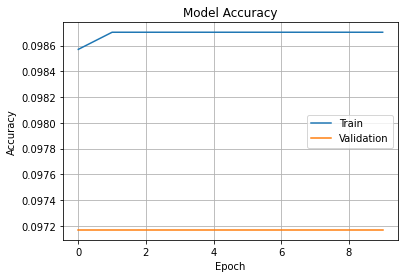

In [ ]:
import matplotlib.pyplot as plt

plt.title("Model Accuracy")
plt.plot(t_accs, label='Training Accuracy')
plt.plot(v_accs, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
from torch import nn, optim, from_numpy, tensor
import numpy as np
from torch.utils.data import Dataset, DataLoader 


class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256,120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120,84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84,10)
        self.relu5 = nn.ReLU()
        self.logsoft = nn.LogSoftmax(dim=1)

    def forward(self,input):
        y= self.conv1(input)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0],-1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y


In [ ]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision.datasets import mnist
from torch.nn import MSELoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor #읽어드린 값을 텐서로 바꾸기 위함

batch_size = 256
train_dataset = mnist.MNIST(root='./train', train=True, transform=ToTensor(), download=True)
test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor(), download=True)
trainloader = DataLoader(train_dataset, batch_size = batch_size)
testloader = DataLoader(test_dataset, batch_size = batch_size)


#모델 선언
model = LeNet5().cuda() #gpu 할당
optimizer = SGD(model.parameters(), lr=1e-1)
criterion = MSELoss()
criterion = criterion.cuda()
epochs = 10

#train code
t_accs, v_accs, t_loss, v_loss = [], [], [], []
for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()

    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        output = model(images)
        
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        #mse 구하기위해 더미변수 생성
        target = torch.randn(10)  # a dummy target, for example
        target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target.cuda())
        loss.backward(retain_graph=True)
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, target.cuda()).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))

PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([256, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([96, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([16, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_l

==>Epoch[1/10]
loss: 0.9698009343223369, accuracy: 0.10068151354789734. val_loss:1.825135514140129
==>Epoch[2/10]
loss: 0.990506768353442, accuracy: 0.09870345890522003. val_loss:2.170812451839447
==>Epoch[3/10]
loss: 1.0480244982115765, accuracy: 0.09870345890522003. val_loss:0.8155735015869141
==>Epoch[4/10]
loss: 0.9840208472723656, accuracy: 0.09870345890522003. val_loss:0.5568431913852692
==>Epoch[5/10]
loss: 1.0028789312915598, accuracy: 0.09870345890522003. val_loss:0.7871665507555008
==>Epoch[6/10]
loss: 0.9951443915037399, accuracy: 0.09870345890522003. val_loss:1.454115277528763
==>Epoch[7/10]
loss: 1.0186904633298832, accuracy: 0.09870345890522003. val_loss:0.9381483107805252
==>Epoch[8/10]
loss: 0.9843570820194609, accuracy: 0.09870345890522003. val_loss:1.8273655354976654
==>Epoch[9/10]
loss: 0.9996349078543643, accuracy: 0.09870345890522003. val_loss:0.2586476385593414
==>Epoch[10/10]
loss: 1.0472948243009284, accuracy: 0.09870345890522003. val_loss:0.4644823007285595


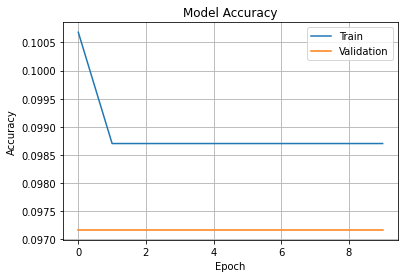

In [ ]:
import matplotlib.pyplot as plt

plt.title("Model Accuracy")
plt.plot(t_accs, label='Training Accuracy')
plt.plot(v_accs, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 3. 문제3
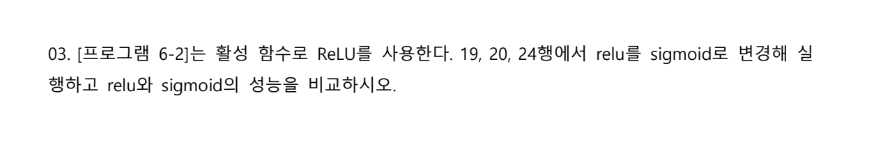

In [ ]:
from torch import nn, optim, from_numpy, tensor
import numpy as np
from torch.utils.data import Dataset, DataLoader 


class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.sigmoid1 = nn.Sigmoid()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.sigmoid2 = nn.Sigmoid()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256,120)
        self.sigmoid3 = nn.Sigmoid()
        self.fc2 = nn.Linear(120,84)
        self.sigmoid4 = nn.Sigmoid()
        self.fc3 = nn.Linear(84,10)
        self.sigmoid5 = nn.Sigmoid()

    def forward(self,input):
        y= self.conv1(input)
        y = self.sigmoid1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.sigmoid2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0],-1)
        y = self.fc1(y)
        y = self.sigmoid3(y)
        y = self.fc2(y)
        y = self.sigmoid4(y)
        y = self.fc3(y)
        y = self.sigmoid5(y)
        return y


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor #읽어드린 값을 텐서로 바꾸기 위함

batch_size = 256
train_dataset = mnist.MNIST(root='./train', train=True, transform=ToTensor(), download=True)
test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor(), download=True)
trainloader = DataLoader(train_dataset, batch_size = batch_size)
testloader = DataLoader(test_dataset, batch_size = batch_size)


#모델 선언
model = LeNet5().cuda() #gpu 할당
optimizer = SGD(model.parameters(), lr=1e-1)
criterion = CrossEntropyLoss()
epochs = 10

#train code
t_accs, v_accs, t_loss, v_loss = [], [], [], []
for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()

    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))

PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

KeyboardInterrupt: ignored

# 4. 문제4
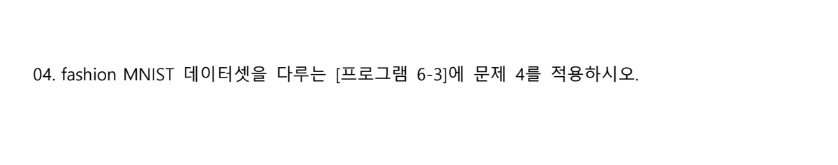

In [ ]:
# 기본

from torchvision import datasets, transforms
import torch
from torch import nn, optim
import torch.nn.functional as F

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = datasets.FashionMNIST('./MNIST_data/', download = True, train=True, transform = transform)
testset = datasets.FashionMNIST('./MNIST_data/', download = True, train=False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.body = nn.Sequential(
            nn.Linear(784, 256), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64,10),
            nn.LogSoftmax(dim=1)
        )
    def forward(self,x):
        return self.body(x)
model = CNN().cuda()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)
epochs = 20


#train code
t_accs, v_accs, t_loss, v_loss = [], [], [], []
for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()

    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))


==>Epoch[1/20]
loss: 0.6026799693735424, accuracy: 0.7831156849861145. val_loss:0.45781492740864965
==>Epoch[2/20]
loss: 0.46055233915413873, accuracy: 0.8353877663612366. val_loss:0.43902294375714224
==>Epoch[3/20]
loss: 0.41912765093227183, accuracy: 0.8517624139785767. val_loss:0.4108788319833719
==>Epoch[4/20]
loss: 0.4035198349736011, accuracy: 0.8574093580245972. val_loss:0.38949641253158546
==>Epoch[5/20]
loss: 0.3869827576696491, accuracy: 0.8631396293640137. val_loss:0.39991197255766314
==>Epoch[6/20]
loss: 0.3721255620818402, accuracy: 0.866537868976593. val_loss:0.3929062561624369
==>Epoch[7/20]
loss: 0.3652909219042579, accuracy: 0.8691031336784363. val_loss:0.4029850244142447
==>Epoch[8/20]
loss: 0.3631849645980513, accuracy: 0.8719682693481445. val_loss:0.385184943581083
==>Epoch[9/20]
loss: 0.3542507231505568, accuracy: 0.8749333620071411. val_loss:0.38032268101622346
==>Epoch[10/20]
loss: 0.345798595937521, accuracy: 0.8766324520111084. val_loss:0.3659437181084019
==>Ep

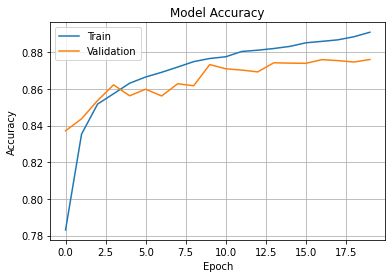

In [ ]:
import matplotlib.pyplot as plt

plt.title("Model Accuracy")
plt.plot(t_accs, label='Training Accuracy')
plt.plot(v_accs, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

## sigmoid

In [ ]:
# 기본

from torchvision import datasets, transforms
import torch
from torch import nn, optim
import torch.nn.functional as F

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = datasets.FashionMNIST('./MNIST_data/', download = True, train=True, transform = transform)
testset = datasets.FashionMNIST('./MNIST_data/', download = True, train=False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.body = nn.Sequential(
            nn.Linear(784, 256), 
            nn.Sigmoid(),
            nn.Dropout(0.2),
            nn.Linear(256,128),
            nn.Sigmoid(),
            nn.Dropout(0.2),
            nn.Linear(128,64),
            nn.Sigmoid(),
            nn.Dropout(0.2),
            nn.Linear(64,10),
            nn.LogSoftmax(dim=1)
        )
    def forward(self,x):
        return self.body(x)
model = CNN().cuda()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)
epochs = 20


#train code
t_accs, v_accs, t_loss, v_loss = [], [], [], []
for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()

    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))



PATH = './model.pth'
torch.save(model.state_dict(), PATH)

==>Epoch[1/20]
loss: 0.7974502325121527, accuracy: 0.7071395516395569. val_loss:0.5278536233173055
==>Epoch[2/20]
loss: 0.4966481993796983, accuracy: 0.82674241065979. val_loss:0.44527476503970514
==>Epoch[3/20]
loss: 0.4391755567653093, accuracy: 0.8466484546661377. val_loss:0.403570187889087
==>Epoch[4/20]
loss: 0.407003915497362, accuracy: 0.856809675693512. val_loss:0.40265588035249406
==>Epoch[5/20]
loss: 0.39082325778917465, accuracy: 0.860324501991272. val_loss:0.3902418224295233
==>Epoch[6/20]
loss: 0.37556063692802305, accuracy: 0.866237998008728. val_loss:0.3702072595145292
==>Epoch[7/20]
loss: 0.3607801094746539, accuracy: 0.8709854483604431. val_loss:0.3663872740450938
==>Epoch[8/20]
loss: 0.3567240142873101, accuracy: 0.8729011416435242. val_loss:0.36552913714746
==>Epoch[9/20]
loss: 0.34685556003565726, accuracy: 0.8747168183326721. val_loss:0.37087327213424026
==>Epoch[10/20]
loss: 0.3363739076946209, accuracy: 0.879164457321167. val_loss:0.3552044777164034
==>Epoch[11/2

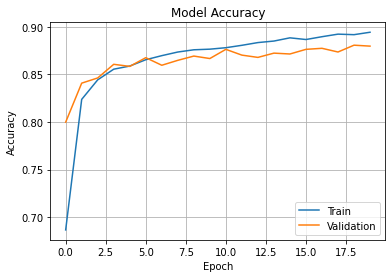

In [ ]:
import matplotlib.pyplot as plt

plt.title("Model Accuracy")
plt.plot(t_accs, label='Training Accuracy')
plt.plot(v_accs, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 5. 문제5
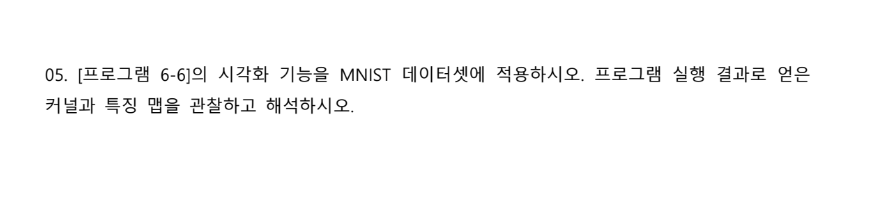

In [ ]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import torch.nn.functional as F

normalize = transforms.Normalize(mean = [x/255.0 for x in [125.3, 123.0, 113.9]], std = [x / 255.0 for x in [63.0, 62.1, 66.7]])

batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), normalize])


batch_size = 256
train_dataset = mnist.MNIST(root='./train', train=True, transform=ToTensor(), download=True)
test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor(), download=True)
trainloader = DataLoader(train_dataset, batch_size = batch_size)
testloader = DataLoader(test_dataset, batch_size = batch_size)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ksize =2, stride = 1, pad = 1):
        super(BasicBlock, self).__init__()
        self.body = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, pad),
            nn.ReLU(inplace= True)
        )
    def forward(self, x):
        out = self.body(x)
        return out


# define network 아키텍처

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.b1 = BasicBlock(1, 28)
        self.b2 = BasicBlock(28,28)
        self.maxpool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(0.25)
        self.b3 = BasicBlock(28, 64)
        self.b4 = BasicBlock(64, 64)
        self.linear1 = nn.Linear(4096, 512)
        self.linear2 = nn.Linear(512, 10)

    def forward(self, x):
        out = self.b1(x)
        out = self.b2(out)
        out = self.maxpool(out)
        out = self.dropout(out)
        out = self.b3(out)
        out = self.b4(out)
        out = self.maxpool(out)
        out = self.dropout(out)
        out = out.view(out.size(0), -1)
        out = self.linear1(out)
        out = self.dropout(out)
        out = self.linear2(out)
        
        return out

model = CNN().cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = optim.Adam(model.parameters(), lr = 0.002)
epochs = 30
t_accs, v_accs, t_accs, v_loss = [],[],[],[]

for epoch in range(epochs):
    train_loss=0
    train_accuracy=0
    model.train()
    #training pass

    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    t_accs.append(train_accuracy/len(trainloader))
    t_loss.append(train_loss/len(trainloader))

    ## validation
    test_loss =0
    test_accuracy = 0
    model.eval()
    for images, labels in testloader:
        images = images.cuda()
        labels = labels.cuda()
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class ==labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    v_accs.append(test_accuracy/len(testloader))
    v_loss.append(test_loss/len(testloader))

    print("==>Epoch[{}/{}]".format(epoch+1, epochs))
    print("loss: {}, accuracy: {}. val_loss:{}".format(t_loss[-1], t_accs[-1], v_loss[-1], v_accs[-1]))



PATH = './model.pth'
torch.save(model.state_dict(), PATH)

==>Epoch[1/30]
loss: 0.36634434359544454, accuracy: 0.8837488889694214. val_loss:0.06912651578022633
==>Epoch[2/30]
loss: 0.09852457719438888, accuracy: 0.9695257544517517. val_loss:0.050656619533401684
==>Epoch[3/30]
loss: 0.07820732875211918, accuracy: 0.9756371974945068. val_loss:0.04295481996232411
==>Epoch[4/30]
loss: 0.06329425661676029, accuracy: 0.9807790517807007. val_loss:0.0409703855519183
==>Epoch[5/30]
loss: 0.05847291424375107, accuracy: 0.9818207025527954. val_loss:0.03613546700107691
==>Epoch[6/30]
loss: 0.05407188125945469, accuracy: 0.983133852481842. val_loss:0.03411318526850664
==>Epoch[7/30]
loss: 0.049683716166467266, accuracy: 0.9841311573982239. val_loss:0.034281705750254333
==>Epoch[8/30]
loss: 0.045296015328123294, accuracy: 0.9854111075401306. val_loss:0.04356175409197931
==>Epoch[9/30]
loss: 0.04359671818934619, accuracy: 0.9866079092025757. val_loss:0.03413791366374426
==>Epoch[10/30]
loss: 0.04099613883819907, accuracy: 0.9873891472816467. val_loss:0.03472

b1.body.0.weight torch.Size([28, 1, 2, 2])
b2.body.0.weight torch.Size([28, 28, 2, 2])
b3.body.0.weight torch.Size([64, 28, 2, 2])
b4.body.0.weight torch.Size([64, 64, 2, 2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


IndexError: ignored

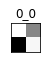

In [ ]:
kernels = []
weights = []
bias = []

for name, param in model.named_parameters():
    if 'body' in name:
        if 'weight' in name:
            kernels.append(name)
            minv, maxv = param.min(), param.max()
            param = (param-minv) / (maxv - minv)
            weights.append(param.cpu().detach().numpy())
            print(name, param.shape)

n_kernels = 32

plt.figure(figsize = (20,3))
plt.title("kernels of conv2d")
for i in range(n_kernels):
    f = weights[0][i, :, :, :]
    for j in range(2):
        plt.subplot(3, n_kernels, j*n_kernels*i+1)
        plt.imshow(f[j, :, :], cmap = 'gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i) + '_' + str(j))

In [ ]:
for a, b in trainloader:
    print(a, b)

RuntimeError: ignored

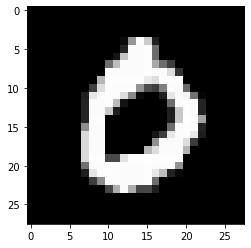

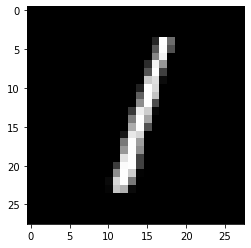

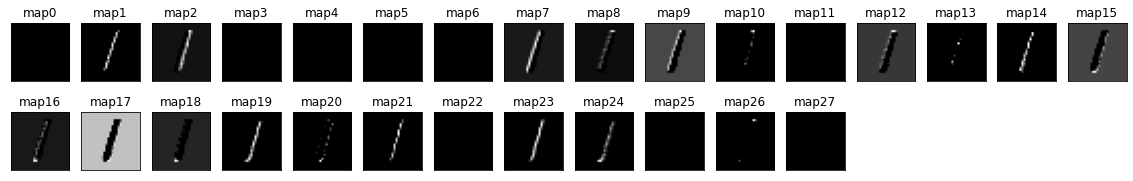

In [ ]:
for test_images, _ in testloader:
    x_test = test_images[2]
    break

plt.imshow(x_test[0], cmap = 'gray')

x_test = x_test.unsqueeze(0)
x_test = partial_Model(x_test).detach().numpy().squeeze()
plt.figure(figsize=(20,3))
for i in range(28):
    plt.subplot(2, 16, i+1)
    plt.imshow(x_test[i,:,:], cmap = 'gray')
    plt.xticks([]);plt.yticks([])
    plt.title("map"+str(i))
plt.show()


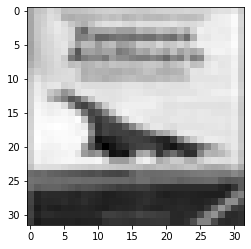

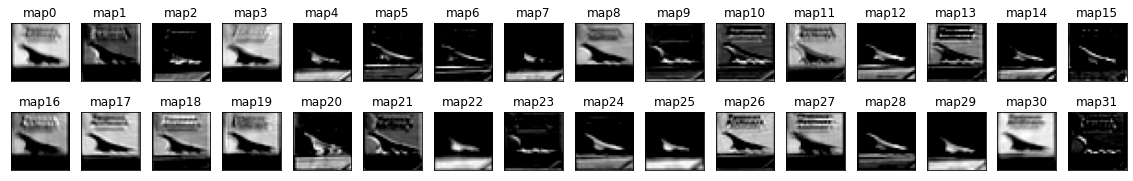

In [ ]:
for test_images, _ in testloader:
    x_test = test_images[3]
    break

plt.imshow(x_test[1, :,:], cmap = 'gray')

x_test = x_test.unsqueeze(0)
x_test = partial_Model(x_test).detach().numpy().squeeze()
plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2, 16, i+1)
    plt.imshow(x_test[i,:,:], cmap = 'gray')
    plt.xticks([]);plt.yticks([])
    plt.title("map"+str(i))
plt.show()


In [ ]:
class partial_CNN(nn.Module):
    def __init__(self):
        super(partial_CNN, self).__init__()
        self.b1 = BasicBlock(1,28)
    def forward(self, x):
        out = self.b1(x)
        return out


RuntimeError: ignored